In [62]:
import pandas as pd
import os
import csv
import re
import numpy as np
import math
import json
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## import and process data

In [2]:
param_df = pd.read_csv('paramAna.csv')

In [3]:
print(param_df)

       behav         S         a1          a2         a5  a6   a7         h1  \
0        det  0.026530  36.016914   68.282095  13.614298   2  300  22.109476   
1        det  0.085090  46.346234   93.782816   5.348970   2  300   1.612786   
2        det  0.026230  29.587058   74.744549   8.274533   2  300   2.999507   
3     nonres -0.425109  29.565711   88.240518  38.277156   2  300  45.175830   
4     nonres -0.193740  32.287825   61.879234  30.174196   2  300  27.250069   
..       ...       ...        ...         ...        ...  ..  ...        ...   
73       sto  5.818668  21.314040  160.641908  12.025107   2  300   5.018442   
74       sto  0.091125  14.413238  106.917255  22.062286   2  300   8.838773   
75  pulsing?  0.059273   7.232497  182.271041  15.242197   2  300   8.429084   
76  pulsing? -4.212513   9.235405  160.697420  40.223145   2  300   8.519308   
77       sto -5.234851   5.585773   83.420706  18.137962   2  300   8.124010   

           h2         h5  ...    Decay4

In [5]:
print(param_df.columns)

Index(['behav', 'S', 'a1', 'a2', 'a5', 'a6', 'a7', 'h1', 'h2', 'h5', 'c1',
       'c2', 'c3', 'c4', 'd1', 'd3', 'Decay1', 'Decay2', 'Decay4', 'Decay7',
       'Decay8', 'leakage_A1', 'leakage_B', 'leakage_HSPR', 'hstart',
       'hduration', 'model_name', 'end_time'],
      dtype='object')


In [7]:
col_to_drop = ['a6', 'a7', 'hstart', 'hduration', 'model_name', 'end_time','Decay1', 'Decay2', 'Decay4', 'Decay7','Decay8', 'S']
param_filter = param_df.drop(col_to_drop, axis = 1)
param_filter = param_filter[param_filter['behav'] != 'pulsing?']
print(param_filter)

     behav         a1          a2         a5         h1         h2         h5  \
0      det  36.016914   68.282095  13.614298  22.109476  14.245713   6.488992   
1      det  46.346234   93.782816   5.348970   1.612786  26.336954   6.105349   
2      det  29.587058   74.744549   8.274533   2.999507  13.184817  33.930364   
3   nonres  29.565711   88.240518  38.277156  45.175830  48.856182  25.748393   
4   nonres  32.287825   61.879234  30.174196  27.250069  26.557023  19.488984   
..     ...        ...         ...        ...        ...        ...        ...   
71     sto   9.305160  146.020816  34.115271   5.873228   4.234070   7.862084   
72     det  49.432126  187.876779  24.082035   2.311306   9.250426   3.516223   
73     sto  21.314040  160.641908  12.025107   5.018442   2.515993   5.328950   
74     sto  14.413238  106.917255  22.062286   8.838773   3.637307   6.024984   
77     sto   5.585773   83.420706  18.137962   8.124010   7.375994   9.645206   

           c1        c2    

In [25]:
param_to_test = param_filter.drop('behav',axis =1).reset_index(drop = True)
behav_label = param_filter['behav'].reset_index(drop = True)
print(param_to_test)
print(behav_label)

           a1          a2         a5         h1         h2         h5  \
0   36.016914   68.282095  13.614298  22.109476  14.245713   6.488992   
1   46.346234   93.782816   5.348970   1.612786  26.336954   6.105349   
2   29.587058   74.744549   8.274533   2.999507  13.184817  33.930364   
3   29.565711   88.240518  38.277156  45.175830  48.856182  25.748393   
4   32.287825   61.879234  30.174196  27.250069  26.557023  19.488984   
..        ...         ...        ...        ...        ...        ...   
71   9.305160  146.020816  34.115271   5.873228   4.234070   7.862084   
72  49.432126  187.876779  24.082035   2.311306   9.250426   3.516223   
73  21.314040  160.641908  12.025107   5.018442   2.515993   5.328950   
74  14.413238  106.917255  22.062286   8.838773   3.637307   6.024984   
75   5.585773   83.420706  18.137962   8.124010   7.375994   9.645206   

           c1        c2         c3        c4        d1        d3  leakage_A1  \
0    6.791546  1.841346   9.390998  0.17292

## plot param distribution

In [68]:

sto_df = param_filter[param_filter['behav'] == 'sto'].reset_index(drop = True)
det_df = param_filter[param_filter['behav'] == 'det'].reset_index(drop = True)
nonres_df = param_filter[param_filter['behav'] == 'nonres'].reset_index(drop = True)
print(sto_df.shape)
print(det_df.shape)
print(nonres_df.shape)
print(sto_df.columns)

(28, 16)
(37, 16)
(11, 16)
Index(['behav', 'a1', 'a2', 'a5', 'h1', 'h2', 'h5', 'c1', 'c2', 'c3', 'c4',
       'd1', 'd3', 'leakage_A1', 'leakage_B', 'leakage_HSPR'],
      dtype='object')


### summary fig

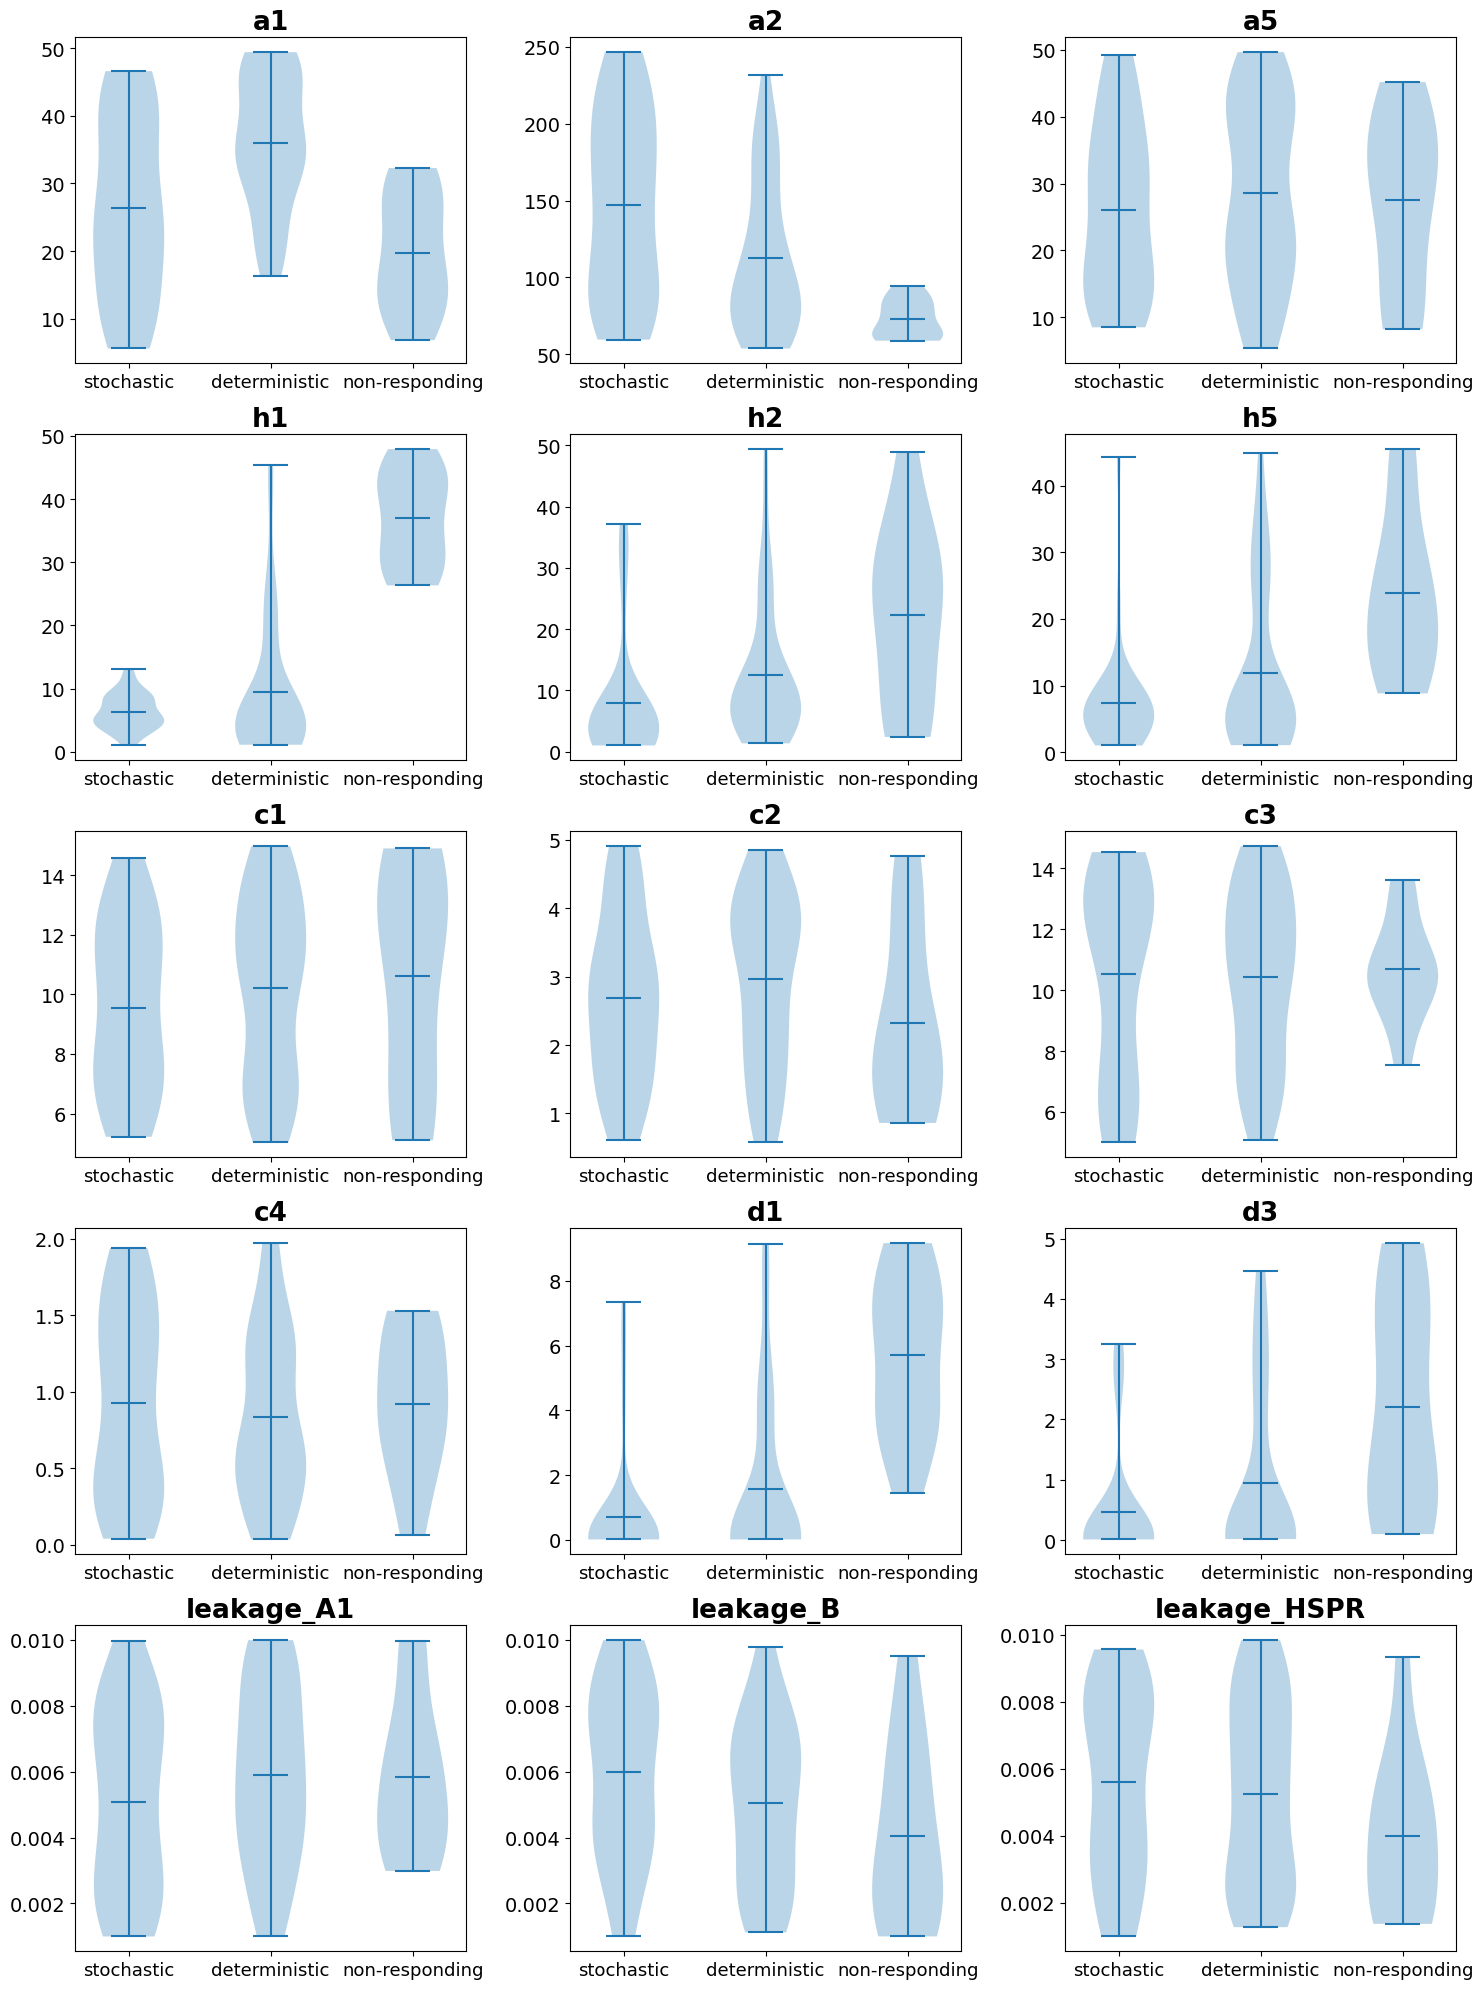

In [110]:
fig, ax = plt.subplots(ncols = 3, nrows = 5, figsize = (15, 20))
ax = ax.flatten()
for i, para in enumerate(param_to_test.columns):
    ax[i].violinplot(dataset=[sto_df[para], det_df[para], nonres_df[para]], showmeans=True)
    # Set x-axis ticks and labels
    ax[i].set_xticks([1, 2, 3])
    ax[i].set_xticklabels(['stochastic', 'deterministic', 'non-responding'], fontsize = 13)
    ax[i].yaxis.set_tick_params(labelsize=14)

    # Set title, labels, and grid
    ax[i].set_title(para, fontsize = 19,fontweight='bold')
    #ax[i].set_xlabel('model behaviour')
    #ax[i].set_ylabel('Value')
    #ax[i].grid(True)
plt.tight_layout()
plt.savefig('behavAna_param_distribution_nogrid.svg')
plt.show()


### stats test

In [91]:
from scipy.stats import kruskal

In [111]:
for para in param_to_test.columns:
    group1 = sto_df[para]
    group2 = det_df[para]
    kw_statistic, p_value = kruskal(group1, group2)
    if p_value < 0.05: 
        print(f'\n{para}, sto vs det, significant')
        #print(f"Kruskal-Wallis Test Statistic:", kw_statistic)
        print("P-Value:", p_value)

    group1 = sto_df[para]
    group2 = nonres_df[para]
    kw_statistic, p_value = kruskal(group1, group2)
    if p_value < 0.05: 
        print(f'\n{para}, sto vs nonres, significant')
        #print(f"Kruskal-Wallis Test Statistic:", kw_statistic)
        print("P-Value:", p_value)

    group1 = nonres_df[para]
    group2 = det_df[para]
    kw_statistic, p_value = kruskal(group1, group2)
    if p_value < 0.05: 
        print(f'\n{para}, nonres vs det, significant')
        #print(f"Kruskal-Wallis Test Statistic:", kw_statistic)
        print("P-Value:", p_value)


a1, sto vs det, significant
P-Value: 0.003562787339216615

a1, nonres vs det, significant
P-Value: 8.249102905951961e-05

a2, sto vs det, significant
P-Value: 0.02191469914776841

a2, sto vs nonres, significant
P-Value: 0.0003738737324537767

a2, nonres vs det, significant
P-Value: 0.011926472286971041

h1, sto vs nonres, significant
P-Value: 1.5379069954421406e-06

h1, nonres vs det, significant
P-Value: 6.017816455420109e-06

h2, sto vs det, significant
P-Value: 0.0012855845589498855

h2, sto vs nonres, significant
P-Value: 0.006623238435050424

h5, sto vs nonres, significant
P-Value: 2.5170262121544808e-05

h5, nonres vs det, significant
P-Value: 0.0026565945613610756

d1, sto vs nonres, significant
P-Value: 2.191039058067929e-05

d1, nonres vs det, significant
P-Value: 0.00035821355799643917

d3, sto vs det, significant
P-Value: 0.03517170262103777

d3, sto vs nonres, significant
P-Value: 5.6730986350954974e-05

d3, nonres vs det, significant
P-Value: 0.002258348574499841


### significant subplots

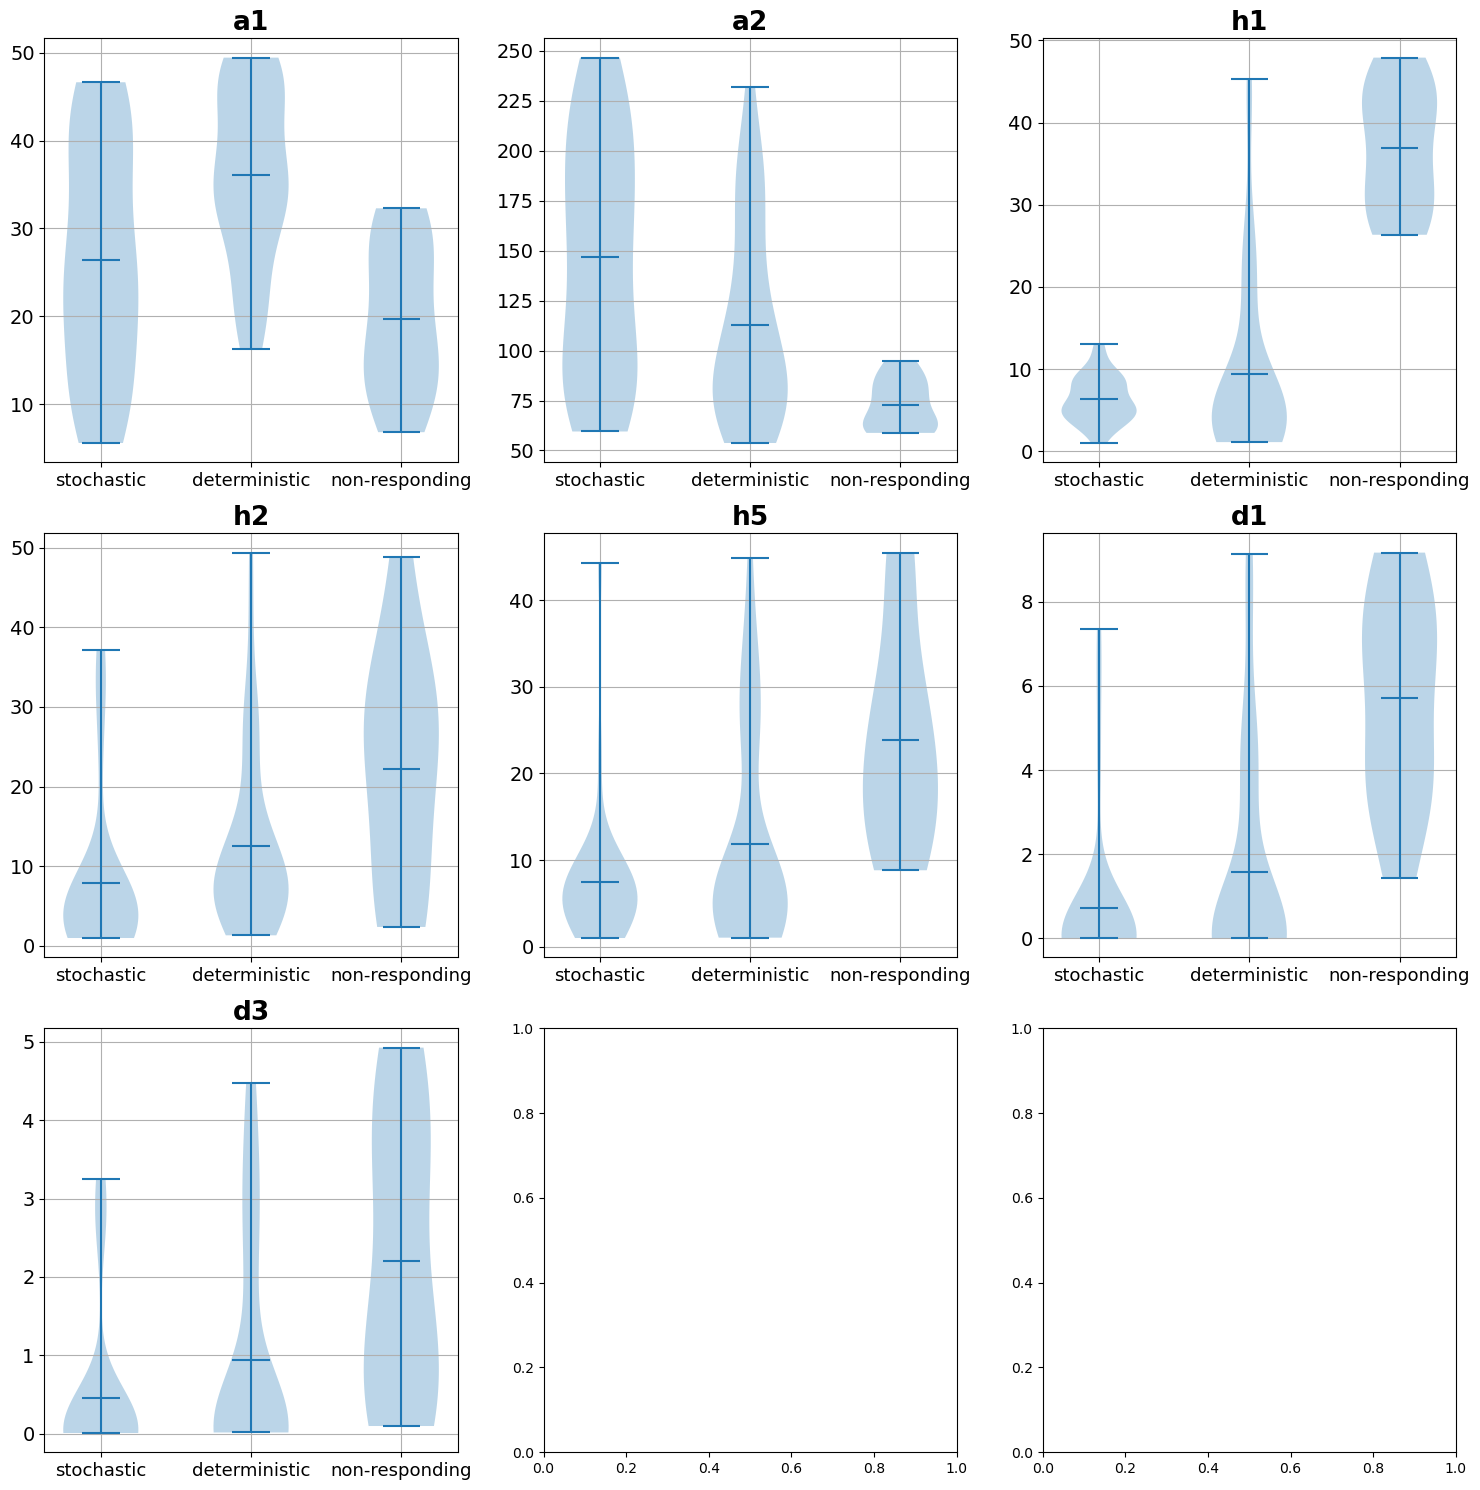

In [108]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (15, 15))
ax = ax.flatten()
for i, para in enumerate(['a1','a2', 'h1', 'h2', 'h5', 'd1', 'd3']):
    ax[i].violinplot(dataset=[sto_df[para], det_df[para], nonres_df[para]], showmeans=True)
    # Set x-axis ticks and labels
    ax[i].set_xticks([1, 2, 3])
    ax[i].set_xticklabels(['stochastic', 'deterministic', 'non-responding'], fontsize = 13)
    ax[i].yaxis.set_tick_params(labelsize=14)

    # Set title, labels, and grid
    ax[i].set_title(para, fontsize = 19,fontweight='bold')
    #ax[i].set_xlabel('model behaviour')
    #ax[i].set_ylabel('Value')
    ax[i].grid(True)
plt.tight_layout()
#plt.savefig('behavAna_param_distribution_nogrid.svg')
plt.show()

### individual fig

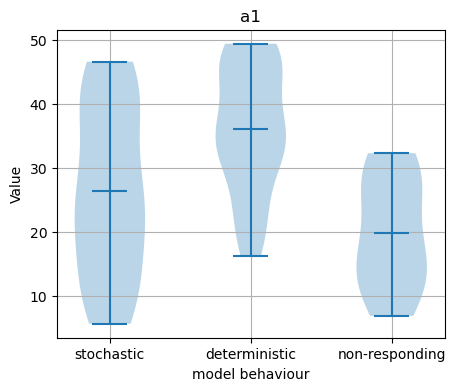

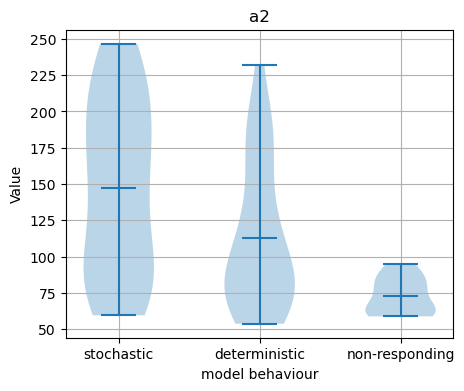

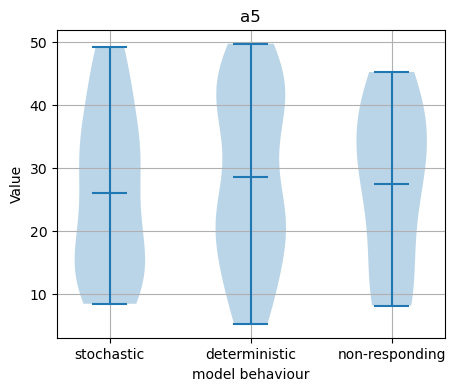

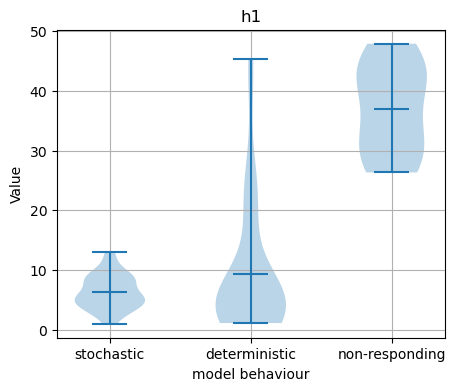

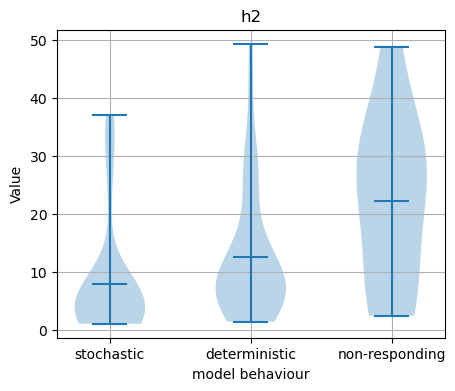

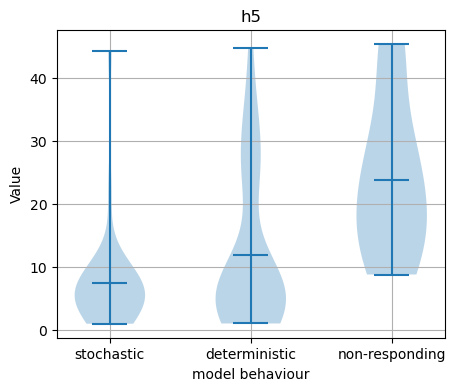

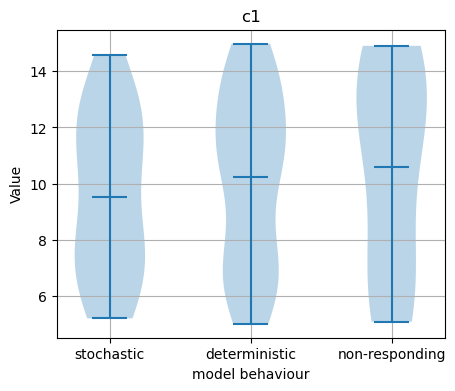

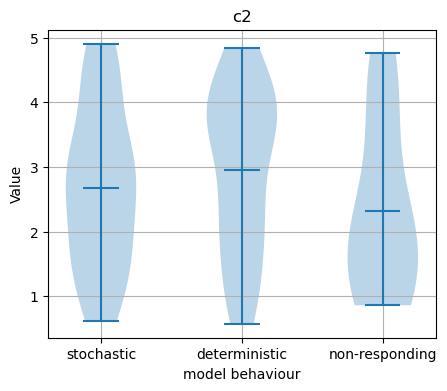

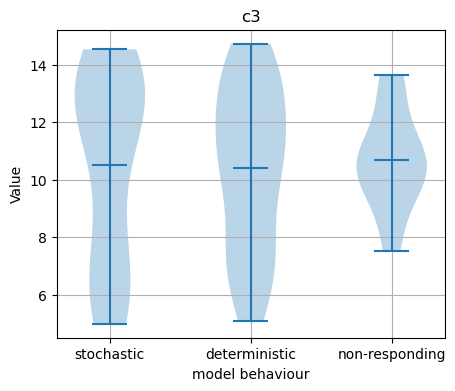

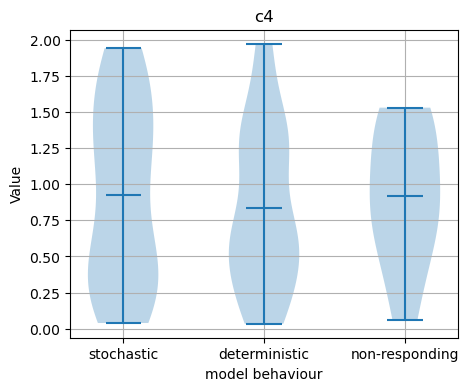

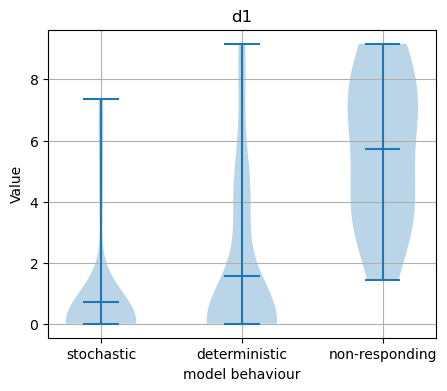

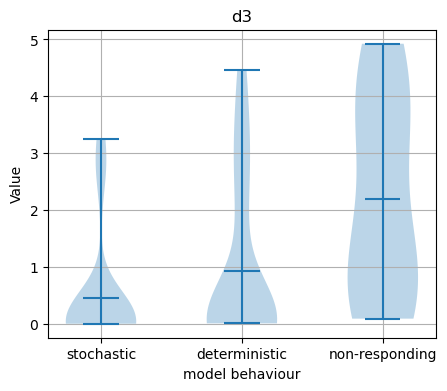

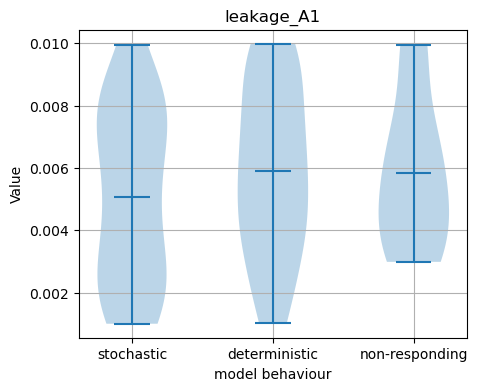

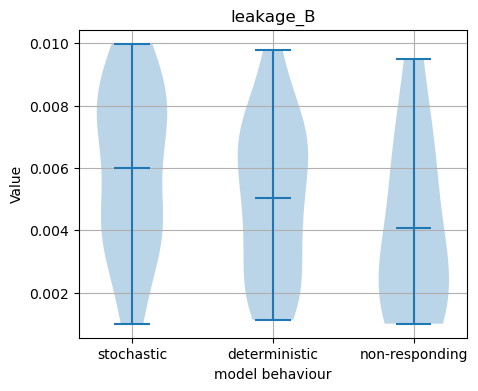

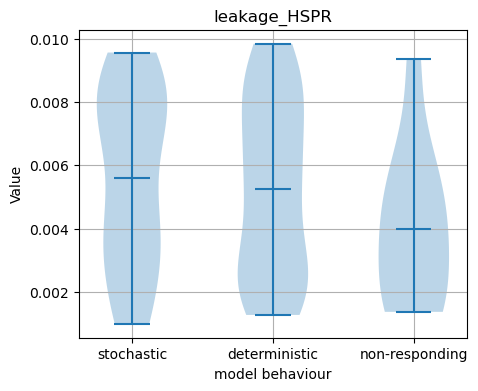

In [71]:
for para in param_to_test.columns:
    plt.figure(figsize=(5, 4))
    plt.violinplot(dataset=[sto_df[para], det_df[para], nonres_df[para]], showmeans=True)
    plt.xticks([1, 2, 3], ['stochastic', 'deterministic', 'non-responding'])
    plt.title(para)
    plt.xlabel('model behaviour')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

## do PCA

In [44]:
pca = PCA(n_components = 0.999)
pca_data = pca.fit_transform(param_to_test)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

### Screen plot

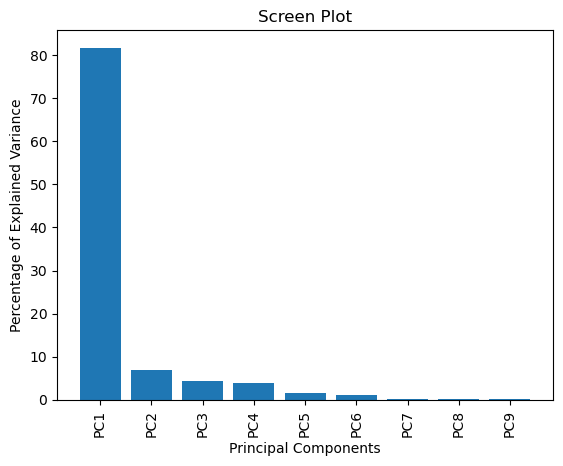

In [46]:
def screenPlot(per_var, labels):
    scrPlt = plt.figure()
    plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
    plt.xticks(rotation=90)
    plt.ylabel("Percentage of Explained Variance")
    plt.xlabel("Principal Components")
    plt.title("Screen Plot")
    plt.show()
    
    #scrPlt.savefig(f"{screenDir}/BinaryScreenPlot-{opt.pfx}-{opt.seg}-sps{opt.sps}-ncp{opt.ncp}.pdf")

screenPlot(per_var, labels)

### PCA plot

In [35]:
pca_df = pd.DataFrame(pca_data, columns = labels)
print(pca_df)

          PC1        PC2        PC3        PC4        PC5        PC6  \
0  -51.016996  -2.558109  11.495649  10.211445 -10.891545   5.774231   
1  -24.451193  -3.998298  12.574627  27.339716   7.401775  13.722618   
2  -45.501124   4.737476  16.025014  12.039403  16.219418 -14.348504   
3  -40.054476  35.567113 -25.366452  -0.732682  -5.612457  14.555146   
4  -60.696715   8.021509  -7.318264   2.557759  -3.396782   4.425428   
..        ...        ...        ...        ...        ...        ...   
71  27.563514  -1.821663   5.028976 -22.119483   5.010656  -0.915264   
72  69.870006  -3.205919  -5.287398  17.479947  -1.350427   2.432748   
73  42.726702   1.446326  18.778274  -1.660753   0.693609  -1.654035   
74 -10.783044  -6.148893  15.812887 -12.542071   0.297223  -0.352690   
75 -34.620420  -3.634931  22.492229 -17.197885   5.798343   1.193338   

         PC7       PC8       PC9  
0   3.204543  0.984076  2.197336  
1   3.935497 -2.032375  0.748079  
2  -3.516925  0.356777  5.9943

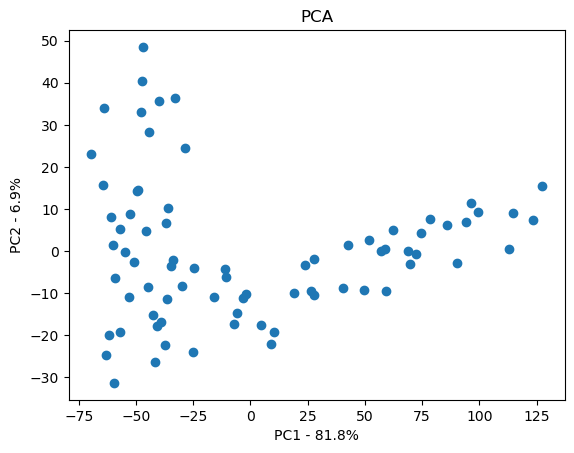

In [56]:
def PCAplot(pca_df, per_var, given_labels):
    plt.scatter(pca_df.PC1, pca_df.PC2)
    #plt.scatter(pca_df.PC1[y_encoded], pca_df.PC2[y_encoded], c=color, label=label_encoder.inverse_transform([category])[0])

    plt.xlabel("PC1 - {0}%".format(per_var[0]))
    plt.ylabel("PC2 - {0}%".format(per_var[1]))
    plt.title(f"PCA")
    plt.show()
    #pcaPlot.savefig(f"{PCAplotDir}/{opt.mvl}-PC1*PC2-{opt.pfx}-{opt.seg}-sps{opt.sps}-ncp{opt.ncp}.pdf")

PCAplot(pca_df, per_var, behav_label)

['det' 'nonres' 'sto']


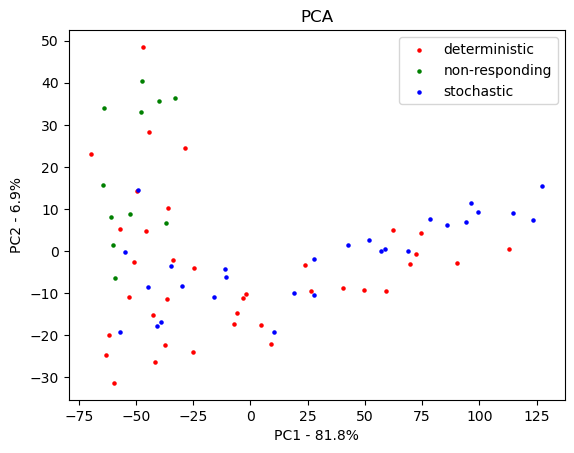

In [61]:
def PCAplot_labelled(pca_df, per_var, given_labels):
    pcaPlot = plt.figure()
    print(given_labels.unique())
    colors = ['r', 'g', 'b']

    #for cate, col in zip(categories, colors):
    det_lab, nonres_lab, sto_lab = [], [], []
    for y in given_labels:
        if y == 'det':
            det_lab.append(True)
            nonres_lab.append(False)
            sto_lab.append(False)
        elif y == 'nonres':
            det_lab.append(False)
            nonres_lab.append(True)
            sto_lab.append(False)
        elif y == 'sto':
            det_lab.append(False)
            nonres_lab.append(False)
            sto_lab.append(True)  
        else: print('unexpected label')
    
    plt.scatter(pca_df.PC1[det_lab], pca_df.PC2[det_lab], s = 5, c = 'r', label = 'deterministic')
    plt.scatter(pca_df.PC1[nonres_lab], pca_df.PC2[nonres_lab], s = 5, c = 'g', label = 'non-responding')
    plt.scatter(pca_df.PC1[sto_lab], pca_df.PC2[sto_lab], s = 5, c = 'b', label = 'stochastic')
    plt.legend()
    plt.xlabel("PC1 - {0}%".format(per_var[0]))
    plt.ylabel("PC2 - {0}%".format(per_var[1]))
    plt.title(f"PCA")
    plt.show()
    #pcaPlot.savefig(f"{PCAplotDir}/{opt.mvl}-PC1*PC2-{opt.pfx}-{opt.seg}-sps{opt.sps}-ncp{opt.ncp}.pdf")

PCAplot_labelled(pca_df, per_var, behav_label)

### PC Linear Combination Analysis

In [42]:
print(labels)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']


In [52]:
def PCAcompAna(pca, labels):
    pcLC = pca.components_
    PCLinComb = pd.DataFrame(pcLC, index = labels, columns = param_to_test.columns)
    PCLinComb = PCLinComb.T #columns= labels , index= paired_set
    print(PCLinComb)

PCAcompAna(pca, labels)

                   PC1       PC2       PC3           PC4       PC5       PC6  \
a1            0.019680 -0.248841 -0.392742  8.481647e-01 -0.225052 -0.084372   
a2            0.981806  0.176562 -0.066900 -3.190158e-03 -0.004765 -0.006136   
a5           -0.006166 -0.290237 -0.834912 -4.644325e-01  0.033107 -0.032324   
h1           -0.114510  0.555798 -0.158149 -1.148402e-01 -0.796380 -0.004579   
h2           -0.101869  0.496790 -0.286619  1.952924e-01  0.395176  0.670173   
h5           -0.105250  0.509678 -0.185104  9.110244e-02  0.395382 -0.721087   
c1           -0.008368 -0.001940 -0.025332  5.199618e-02  0.025850 -0.055987   
c2            0.003138 -0.010388 -0.003759  3.442752e-03  0.028007  0.028849   
c3            0.009363  0.013834 -0.005321 -3.616926e-02 -0.003652  0.111428   
c4            0.000843  0.001833 -0.009191 -7.633107e-03  0.005112  0.009679   
d1           -0.026643  0.078107 -0.037359 -3.212103e-02 -0.003408  0.077092   
d3           -0.013644  0.027856 -0.0247